<a href="https://colab.research.google.com/github/jeannkwonn/pantheon_project/blob/master/Pantheon_Project_Historical_Popularity_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pantheon Project: Historical Popularity Index

## Downloading the dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['font.size'] = 10

original = pd.read_csv('pantheon.project.csv')

In [0]:
# original.columns

In [0]:
# original.shape, prod.shape

In [0]:
# prod.dtypes

In [0]:
prod = original[['full_name', 
                 'sex', 
                 'birth_year', 
                 'city',  
                 'country', 
                 'continent', 
                 'occupation', 
                 'industry', 
                 'domain', 
                 'article_languages', 
                 'historical_popularity_index']]

In [290]:
prod.isnull().sum()

full_name                       0
sex                             0
birth_year                      0
city                            0
country                        33
continent                      30
occupation                      0
industry                        0
domain                          0
article_languages               0
historical_popularity_index     0
dtype: int64

## Finding the top 10 figures in historical popularity index

In [316]:
highest_popularity = prod[['full_name', 'birth_year', 'continent', 'industry', 'historical_popularity_index']].groupby('full_name').max().sort_values('historical_popularity_index', ascending=False).head(10)

highest_popularity

,birth_year,continent,industry,historical_popularity_index
full_name,,,,
Aristotle,-384.0,Europe,Philosophy,31.9938
Plato,-427.0,Europe,Philosophy,31.9888
Jesus Christ,-4.0,Asia,Religion,31.8981
Socrates,-469.0,Europe,Philosophy,31.6521
Alexander the Great,-356.0,Europe,Military,31.5840
Leonardo da Vinci,1452.0,Europe,Invention,31.4644
Confucius,-551.0,Asia,Philosophy,31.3705
Julius Caesar,-100.0,Europe,Government,31.1161
Homer,-800.0,Europe,Language,31.1087


Philosophy    5
Military      1
Language      1
Religion      1
Invention     1
Government    1
Name: industry, dtype: int64

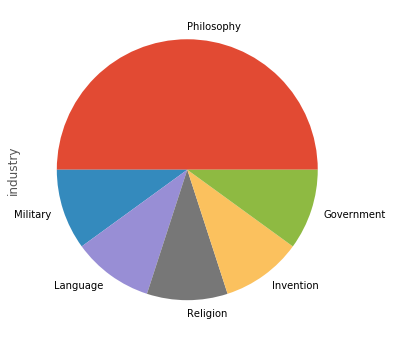

In [292]:
highest_popularity['industry'].value_counts().plot(kind='pie')
highest_popularity['industry'].value_counts()

Europe    8
Asia      2
Name: continent, dtype: int64

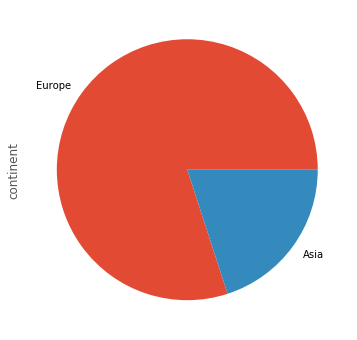

In [293]:
highest_popularity['continent'].value_counts().plot(kind='pie')
highest_popularity['continent'].value_counts()

In [294]:
prod.groupby('industry').mean().sort_values('historical_popularity_index', ascending=False).head(5)
highest_popularity.groupby('industry').mean().sort_values('historical_popularity_index', ascending=False)

,historical_popularity_index
industry,
Religion,31.89810
Philosophy,31.61486
Military,31.58400
Invention,31.46440
Government,31.11610
Language,31.10870


### Looking at decades
*   Of the 10 figures, 9 are born in the years between -1000-0
*   Of the 9 figures born in this time, 5 are philosophers



In [314]:
prod['birth_year'] = pd.to_numeric(prod['birth_year'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


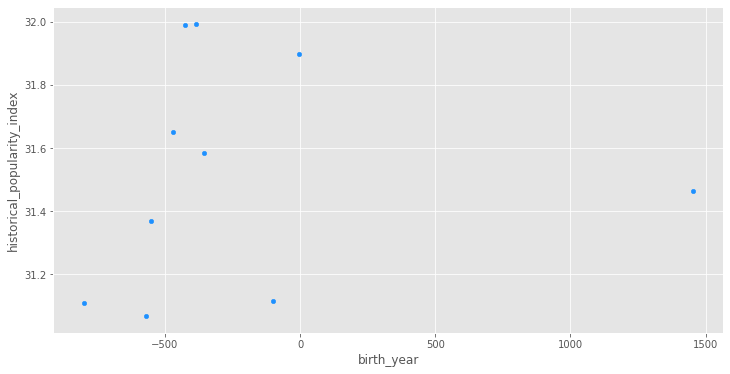

In [317]:
highest_popularity.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(12,6), s=20, alpha=1)

Comparing the scatter graph above to the scatter graph of all birth years

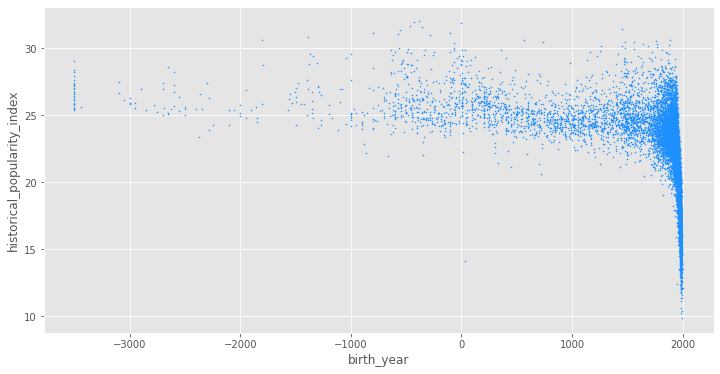

In [0]:
prod.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(12,6), s=1, alpha=1)

## Finding the relationship between the birth years and the industry

In [0]:
prod['industry'].unique()
# convert to list
industries = list(prod['industry'].unique())
industries_key = range(0, len(industries))
industries_key

industry_str_to_int = dict(zip(industries, industries_key))
# b = list(industry_str_to_int.keys())
# c = list(industry_str_to_int.values())

sub_prod_industry = prod.applymap(lambda s: industry_str_to_int.get(s) if s in industry_str_to_int else s)

In [0]:
sub_prod_industry['birth_year'] = pd.to_numeric(sub_prod_industry['birth_year'], errors='coerce')

In [0]:
dict(zip(industries, industries_key))

{'Activism': 15,
 'Business': 18,
 'Companions': 14,
 'Computer Science': 26,
 'Dance': 22,
 'Design': 16,
 'Engineering': 21,
 'Explorers': 10,
 'Film And Theatre': 17,
 'Fine Arts': 8,
 'Government': 4,
 'History': 11,
 'Individual Sports': 23,
 'Invention': 3,
 'Language': 5,
 'Law': 25,
 'Math': 6,
 'Media Personality': 24,
 'Medicine': 13,
 'Military': 2,
 'Music': 7,
 'Natural Sciences': 9,
 'Outlaws': 19,
 'Philosophy': 0,
 'Religion': 1,
 'Social Sciences': 12,
 'Team Sports': 20}

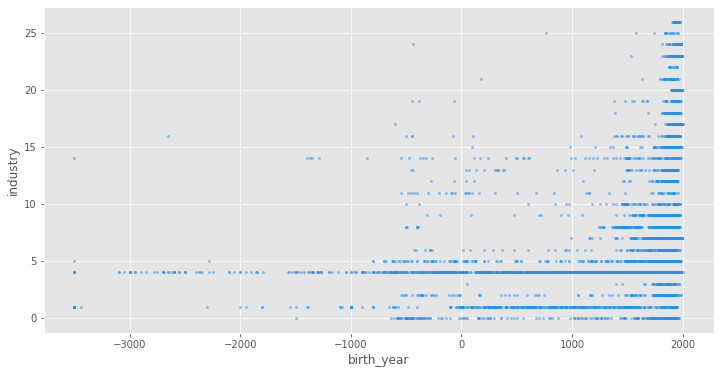

In [300]:
sub_prod_industry.plot(kind='scatter', x='birth_year', y='industry', \
        color='dodgerblue', figsize=(12,6), s=5, alpha=0.5)

In [0]:
sub_prod_industry_female = sub_prod_industry[ sub_prod_industry['sex'] == 'Female'].sort_values(by='industry', ascending=True)
sub_prod_industry_male = sub_prod_industry[ sub_prod_industry['sex'] == 'Male'].sort_values(by='industry', ascending=True)

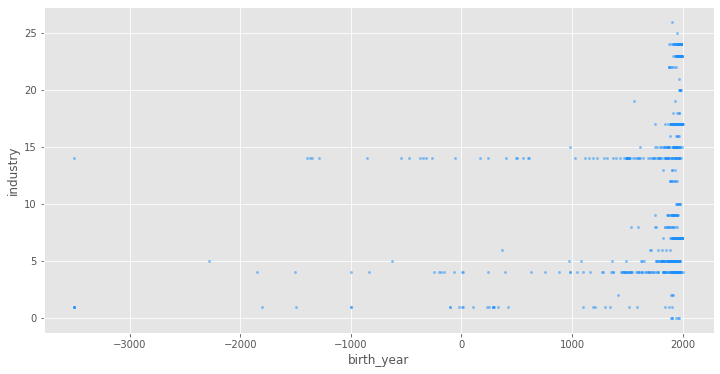

In [302]:
sub_prod_industry_female.plot(kind='scatter', x='birth_year', y='industry', \
        color='dodgerblue', figsize=(12,6), s=5, alpha=0.5)

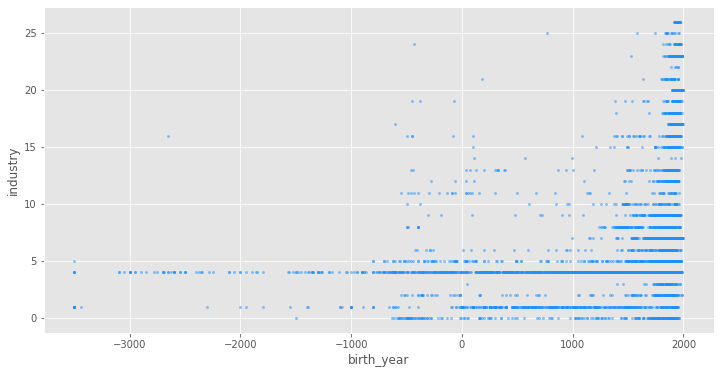

In [303]:
sub_prod_industry_male.plot(kind='scatter', x='birth_year', y='industry', \
        color='dodgerblue', figsize=(12,6), s=5, alpha=0.5)

In [304]:
sub_prod_industry_female.sort_values(by='birth_year', ascending=True).head(1)
sub_prod_industry_female.sort_values(by='birth_year', ascending=True).tail(1)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
11323,Infanta Leonor of Spain,Female,2005.0,Madrid,Spain,Europe,Nobleman,4,Institutions,28,12.1348


In [305]:
sub_prod_industry_male.sort_values(by='birth_year', ascending=True).head(1)
sub_prod_industry_male.sort_values(by='birth_year', ascending=True).tail(1)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
3009,Adam de la Halle,Male,NaN,Arras,France,Europe,Writer,5,Humanities,30,24.5036


## Comparing trends in industries between the first and the last centuries (-3500 and 2000)

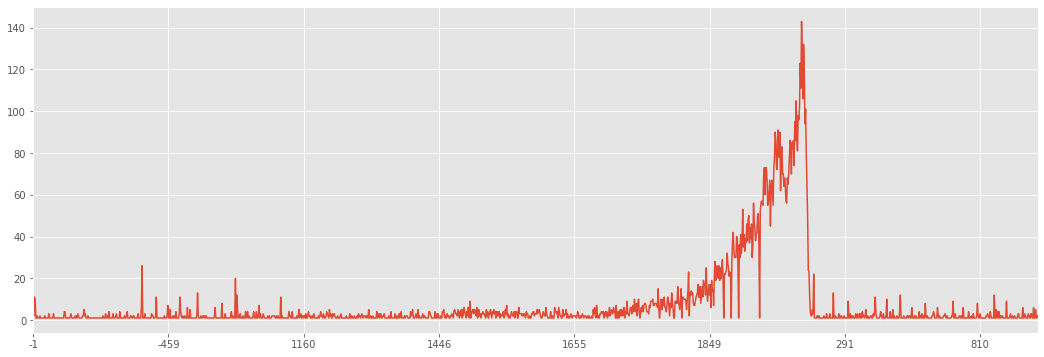

In [0]:
prod['birth_year'].value_counts().sort_index().plot()

In [0]:
sub_prod_years_start = prod[prod['birth_year'] <= -3500]
sub_prod_years_start['industry'].value_counts().plot(kind='pie')

TypeError: ignored

In [0]:
sub_prod_years_start['country'].value_counts().plot(kind='pie')

NameError: ignored

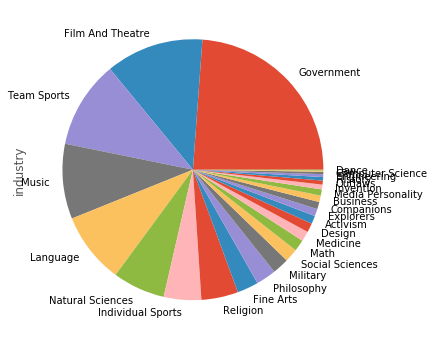

In [0]:
sub_prod_years_end = prod[prod['birth_year'] <= 2000]
sub_prod_years_end['industry'].value_counts().plot(kind='pie')

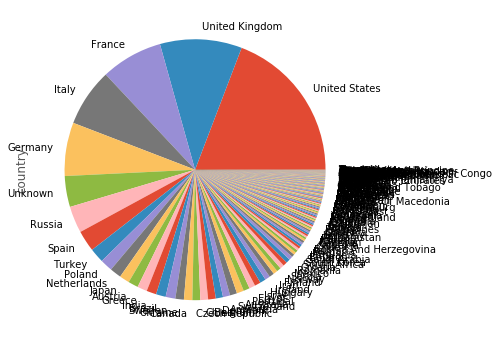

In [0]:
sub_prod_years_end['country'].value_counts().plot(kind='pie')

In [0]:
# prod.sort_values(by='birth_year', ascending=True).head(5)
# prod.rank().head(11)
# prod['birth_year'].value_counts().head(10)

## Comparing trends in industries among male and female figures

In [0]:
sub_prod_industry['sex'].value_counts()

Male      9846
Female    1495
Name: sex, dtype: int64

In [0]:
sub_prod_female = prod[ prod['sex'] == 'Female'].sort_values(by='industry', ascending=True)

In [0]:
sub_prod_male = prod[ prod['sex'] == 'Male'].sort_values(by='industry', ascending=True)

In [0]:
# sub_prod_female['industry'].value_counts().plot(kind='pie')

In [0]:
# sub_prod_male['industry'].value_counts().plot(kind='pie')

In [0]:
sub_prod_female_plot = list(sub_prod_female['industry'].value_counts())
sub_prod_male_plot = list(sub_prod_male['industry'].value_counts())

In [0]:
# sub_prod_female['industry'].value_counts().plot(kind='barh')
# sub_prod_female['industry'].unique()

# sub_prod_male['industry'].value_counts().plot(kind='barh')
# sub_prod_male['industry'].unique()

In [0]:
# sub_prod_female.sort_values(by=['industry'], ascending=[True])['sex']

In [0]:
# sub_prod_male.sort_values(by=['industry'], ascending=[True])['sex']

### Looking at the differences in industry among male and female figures

*   industry with the greatest difference: **Government**
*   industry with the smallest difference: **Dance**
*   industry with the most men: **Government**
*   industry with the most women: **Film And Theatre**
*   industries with more women than men: **Companions, Dance, Media Personality**


In [0]:
female_industry = sub_prod_female['industry'].value_counts().sort_index()

female_industry_new = pd.Series([0, 0], index=['History', 'Invention'])

In [0]:
industries = sorted(industries)

data = {
      'industry' : industries,
      'male' : list(sub_prod_male['industry'].value_counts().sort_index()),
      'female' : list(female_industry.add(female_industry_new, fill_value=0)),
      }

data = pd.DataFrame(data, columns = ['industry', 'male', 'female'])

data['difference']=data['male'] - data['female']
print(data)

             industry  male  female  difference
0            Activism    76    38.0        38.0
1            Business    87     4.0        83.0
2          Companions     7    94.0       -87.0
3    Computer Science    32     1.0        31.0
4               Dance     5     7.0        -2.0
5              Design   122     5.0       117.0
6         Engineering    39     1.0        38.0
7           Explorers    95     7.0        88.0
8    Film And Theatre   870   504.0       366.0
9           Fine Arts   283    16.0       267.0
10         Government  2527   178.0      2349.0
11            History    49     0.0        49.0
12  Individual Sports   411   115.0       296.0
13          Invention    67     0.0        67.0
14           Language   885   114.0       771.0
15                Law    16     1.0        15.0
16               Math   154     7.0       147.0
17  Media Personality    29    58.0       -29.0
18           Medicine   138     4.0       134.0
19           Military   229     4.0     

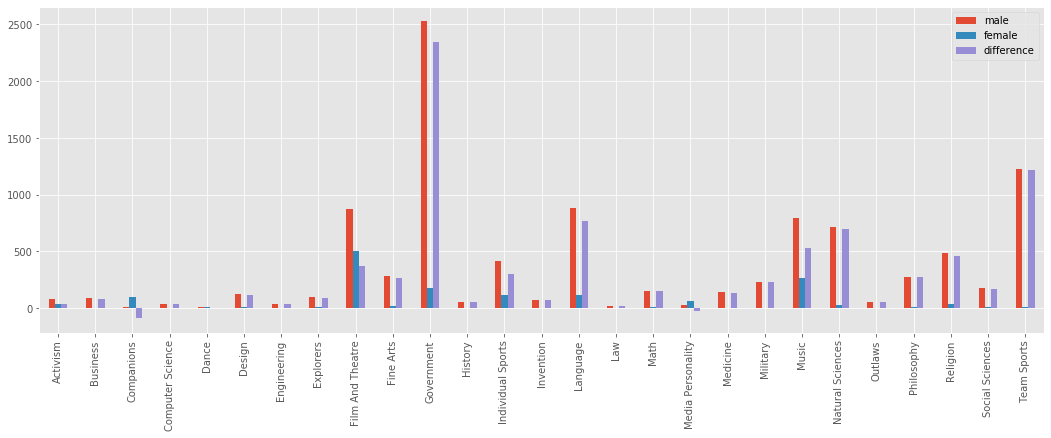

In [0]:
male = list(sub_prod_male['industry'].value_counts().sort_index())
female = list(female_industry.add(female_industry_new, fill_value=0))
difference = list(data['difference'])

index = industries
gender_comparison = pd.DataFrame({'male': male,
                   'female': female,
                   'difference': difference}, index=index)
gender_comparison_plot = gender_comparison.plot.bar(rot=90)

In [0]:
prod[ prod['industry'] == 'Government'].sort_values(by='historical_popularity_index', ascending=False).head(10)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
7,Julius Caesar,Male,-100.0,Rome,Italy,Europe,Politician,Government,Institutions,128,31.1161
14,Adolf Hitler,Male,1889.0,Braunau am Inn,Austria,Europe,Politician,Government,Institutions,169,30.5778
16,Charlemagne,Male,742.0,Liège,Belgium,Europe,Politician,Government,Institutions,116,30.4837
19,Augustus,Male,-63.0,Rome,Italy,Europe,Politician,Government,Institutions,117,30.4195
20,Napoleon Bonaparte,Male,1769.0,Corsica,France,Europe,Politician,Government,Institutions,145,30.3263
28,Cleopatra VII of Egypt,Female,-69.0,Alexandria,Egypt,Africa,Politician,Government,Institutions,100,30.0367
36,Nero,Male,37.0,Anzio,Italy,Europe,Politician,Government,Institutions,79,29.8599
40,Cicero,Male,-106.0,Arpino,Italy,Europe,Politician,Government,Institutions,83,29.7426
45,Hannibal Barca,Male,-248.0,Carthage,Tunisia,Africa,Politician,Government,Institutions,86,29.6911
53,Qin Shi Huang,Male,-259.0,Handan,China,Asia,Politician,Government,Institutions,144,29.5192


In [0]:
prod[ prod['industry'] == 'Dance'].sort_values(by='historical_popularity_index', ascending=False).head(10)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
493,Mata Hari,Female,1876.0,Leeuwarden,Netherlands,Europe,Dancer,Dance,Arts,61,26.9822
1614,Isadora Duncan,Female,1877.0,San Francisco-Bay Area,United States,North America,Dancer,Dance,Arts,54,25.4264
3119,Josephine Baker,Female,1906.0,St. Louis,United States,North America,Dancer,Dance,Arts,42,24.4373
4048,Maurice Béjart,Male,1927.0,Marseille,France,Europe,Dancer,Dance,Arts,33,23.9199
4080,Vaslav Nijinsky,Male,1890.0,Kiev,Ukraine,Europe,Dancer,Dance,Arts,31,23.9014
4799,Anna Pavlova,Female,1881.0,Saint Petersburg,Russia,Europe,Dancer,Dance,Arts,41,23.5206
4852,Rudolf Nureyev,Male,1938.0,Irkutsk,Russia,Europe,Dancer,Dance,Arts,34,23.4958
4865,Pina Bausch,Female,1940.0,Solingen,Germany,Europe,Dancer,Dance,Arts,30,23.4887
6762,Maya Plisetskaya,Female,1925.0,Moscow,Russia,Europe,Dancer,Dance,Arts,28,22.3701
6975,Mikhail Baryshnikov,Male,1948.0,Riga,Latvia,Europe,Dancer,Dance,Arts,29,22.2290


In [0]:
prod[ prod['industry'] == 'Film And Theatre'].sort_values(by='historical_popularity_index', ascending=False).head(10)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
142,Marilyn Monroe,Female,1926.0,Los Angeles,United States,North America,Actor,Film And Theatre,Arts,143,28.3466
232,Bruce Lee,Male,1940.0,San Francisco-Bay Area,United States,North America,Actor,Film And Theatre,Arts,84,27.8142
242,Charlie Chaplin,Male,1889.0,Walworth,United Kingdom,Europe,Actor,Film And Theatre,Arts,145,27.7704
299,Stanley Kubrick,Male,1928.0,New York,United States,North America,Film Director,Film And Theatre,Arts,89,27.5175
321,Marlon Brando,Male,1924.0,Omaha,United States,North America,Actor,Film And Theatre,Arts,100,27.4523
371,Ingmar Bergman,Male,1918.0,Uppsala,Sweden,Europe,Film Director,Film And Theatre,Arts,96,27.3055
388,Al Pacino,Male,1940.0,New York,United States,North America,Actor,Film And Theatre,Arts,73,27.2442
392,Marlene Dietrich,Female,1901.0,Schöneberg,Germany,Europe,Actor,Film And Theatre,Arts,114,27.2298
415,Woody Allen,Male,1935.0,New York,United States,North America,Film Director,Film And Theatre,Arts,77,27.1811
416,Alfred Hitchcock,Male,1899.0,Leytonstone,United Kingdom,Europe,Film Director,Film And Theatre,Arts,100,27.1760


In [0]:
sub_prod_female.sort_values(by='historical_popularity_index', ascending=False).head(10)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
28,Cleopatra VII of Egypt,Female,-69.0,Alexandria,Egypt,Africa,Politician,Government,Institutions,100,30.0367
50,Nefertiti,Female,-1370.0,Thebes,Egypt,Africa,Companion,Companions,Public Figure,74,29.5711
52,Jeanne d'Arc,Female,1412.0,Domrémy-la-Pucelle,France,Europe,Military Personnel,Military,Institutions,104,29.5566
60,Mary,Female,-18.0,Nazareth,Israel,Asia,Religious Figure,Religion,Institutions,100,29.3919
77,Sappho,Female,-625.0,Lesbos Island,Greece,Europe,Writer,Language,Humanities,82,29.1232
82,Mary Magdalene,Female,1.0,Magdala,Israel,Asia,Religious Figure,Religion,Institutions,65,29.0759
87,Elizabeth I of England,Female,1533.0,London,United Kingdom,Europe,Politician,Government,Institutions,106,29.0005
90,Anne Boleyn,Female,1501.0,Norfolk or Kent,United Kingdom,Europe,Companion,Companions,Public Figure,62,28.9534
135,Marie Antoinette,Female,1755.0,Vienna,Austria,Europe,Nobleman,Government,Institutions,65,28.4474
142,Marilyn Monroe,Female,1926.0,Los Angeles,United States,North America,Actor,Film And Theatre,Arts,143,28.3466


In [0]:
sub_prod_male.sort_values(by='historical_popularity_index', ascending=False).head(10)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
0,Aristotle,Male,-384.0,Stageira,Greece,Europe,Philosopher,Philosophy,Humanities,152,31.9938
1,Plato,Male,-427.0,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,142,31.9888
2,Jesus Christ,Male,-4.0,Judea,Israel,Asia,Religious Figure,Religion,Institutions,214,31.8981
3,Socrates,Male,-469.0,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,137,31.6521
4,Alexander the Great,Male,-356.0,Pella,Greece,Europe,Military Personnel,Military,Institutions,138,31.5840
5,Leonardo da Vinci,Male,1452.0,Vinci,Italy,Europe,Inventor,Invention,Science & Technology,174,31.4644
6,Confucius,Male,-551.0,Qufu,China,Asia,Philosopher,Philosophy,Humanities,192,31.3705
7,Julius Caesar,Male,-100.0,Rome,Italy,Europe,Politician,Government,Institutions,128,31.1161
8,Homer,Male,-800.0,Smyrna,Turkey,Europe,Writer,Language,Humanities,141,31.1087
9,Pythagoras,Male,-570.0,Samos Island,Greece,Europe,Philosopher,Philosophy,Humanities,114,31.0691


## Comparing trends in industries among continents and countries

In [0]:
prod['continent'].unique()

array(['Europe', 'Asia', 'Africa', nan, 'South America', 'North America',
       'Unknown', 'Oceania'], dtype=object)

In [0]:
prod['continent'].value_counts()

Europe           6368
North America    2439
Asia             1188
Africa            419
Unknown           408
South America     366
Oceania           123
Name: continent, dtype: int64

### Looking at industry trends in countries in Europe

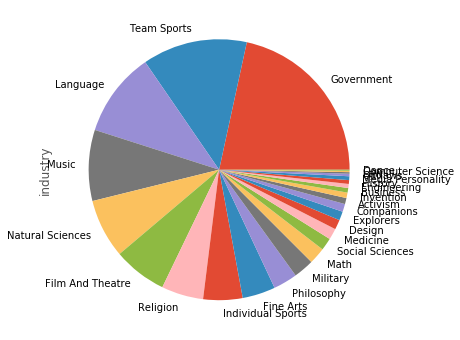

In [0]:
sub_prod_europe = prod[prod['continent'] == 'Europe']
sub_prod_europe['industry'].value_counts().plot(kind='pie')

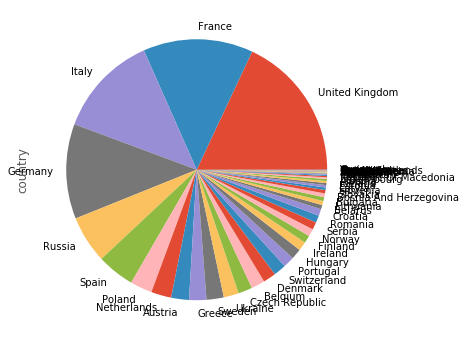

In [0]:
european_countries = sub_prod_europe.sort_values(by='country', ascending=True)
european_countries['country'].value_counts().plot(kind='pie')

In [0]:
sub_prod_europe.sort_values('historical_popularity_index', ascending=False).head(5)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
0,Aristotle,Male,-384.0,Stageira,Greece,Europe,Philosopher,Philosophy,Humanities,152,31.9938
1,Plato,Male,-427.0,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,142,31.9888
3,Socrates,Male,-469.0,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,137,31.6521
4,Alexander the Great,Male,-356.0,Pella,Greece,Europe,Military Personnel,Military,Institutions,138,31.5840
5,Leonardo da Vinci,Male,1452.0,Vinci,Italy,Europe,Inventor,Invention,Science & Technology,174,31.4644


In [0]:
sub_prod_europe['country'].unique(), sub_prod_europe['country'].nunique()

(array(['Greece', 'Italy', 'Turkey', 'Austria', 'Belgium',
        'United Kingdom', 'France', 'Germany', 'Netherlands', 'Russia',
        'Czech Republic', 'Spain', 'Hungary', 'Switzerland', 'Portugal',
        'Serbia', 'Ireland', 'Croatia', 'Poland', 'Republic Of Macedonia',
        'Bulgaria', 'Sweden', 'Denmark', 'Romania', 'Norway', 'Ukraine',
        'Kosovo', 'Iceland', 'Finland', 'Albania', 'Lithuania', 'Cyprus',
        'Bosnia And Herzegovina', 'Latvia', 'Belarus', 'Luxembourg',
        'United States', 'Estonia', 'Slovenia', 'Slovakia', 'Syria',
        'The Netherlands', nan, 'Monaco', 'Montenegro', 'Brazil',
        'Moldova', 'Malaysia', 'Malta', 'Isle Of Man', 'Kyrgyzstan',
        'Chile', 'Gibraltar', 'New Caledonia', 'Suriname', 'Andorra',
        'Liechtenstein', 'Jersey', 'Venezuela', 'Cape Verde'], dtype=object),
 59)

### Looking at industry trends in countries in Asia

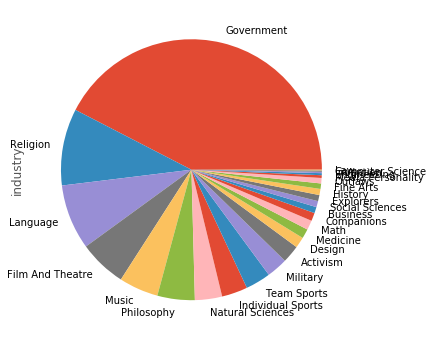

In [0]:
sub_prod_asia = prod[prod['continent'] == 'Asia']
sub_prod_asia['industry'].value_counts().plot(kind='pie')

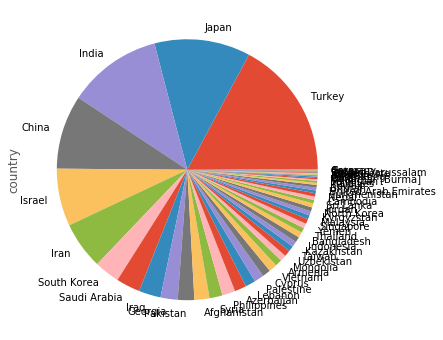

In [0]:
asian_countries = sub_prod_asia.sort_values(by='country', ascending=True)
asian_countries['country'].value_counts().plot(kind='pie')

In [0]:
sub_prod_asia.sort_values('historical_popularity_index', ascending=False).head(5)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
2,Jesus Christ,Male,-4.0,Judea,Israel,Asia,Religious Figure,Religion,Institutions,214,31.8981
6,Confucius,Male,-551.0,Qufu,China,Asia,Philosopher,Philosophy,Humanities,192,31.3705
12,Muhammad,Male,570.0,Mecca,Saudi Arabia,Asia,Religious Figure,Religion,Institutions,150,30.6500
27,Gautama Buddha,Male,-563.0,Lumbini,Nepal,Asia,Philosopher,Philosophy,Humanities,124,30.0418
31,Herodotus,Male,-484.0,Halicarnassus,Turkey,Asia,Historian,History,Humanities,103,29.9592


In [0]:
sub_prod_asia['country'].unique(), sub_prod_asia['country'].nunique()

(array(['Israel', 'China', 'Saudi Arabia', 'Nepal', 'Turkey', 'Mongolia',
        'Afghanistan', 'Palestine', 'India', 'Iraq', 'Syria', 'Georgia',
        'Uzbekistan', 'Iran', 'Jordan', 'Yemen', 'Japan', 'Lebanon',
        'Cyprus', 'Tajikistan', 'Cambodia', 'Kazakhstan', 'Vietnam',
        'Pakistan', nan, 'Indonesia', 'North Korea', 'Bangladesh',
        'Azerbaijan', 'Armenia', 'Myanmar [Burma]', 'South Korea', 'Italy',
        'Turkmenistan', 'Philippines', 'Thailand', 'Kyrgyzstan',
        'Singapore', 'Brunei Darussalam', 'Oman', 'Malaysia',
        'United Arab Emirates', 'Laos', 'Kuwait', 'Belarus', 'Greece',
        'Hong Kong', 'Sri Lanka', 'Taiwan', 'Timor-Leste', 'Qatar',
        'Bahrain', 'Maldives', 'Bhutan', 'Germany'], dtype=object), 54)

### Looking at industry trends in countries in Africa

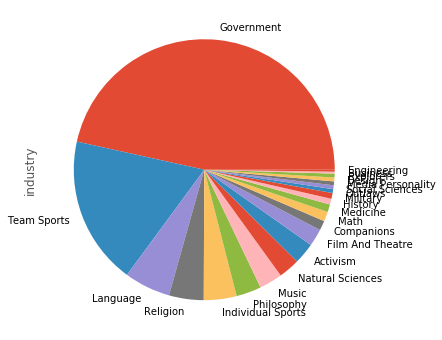

In [0]:
sub_prod_africa = prod[prod['continent'] == 'Africa']
sub_prod_africa['industry'].value_counts().plot(kind='pie')

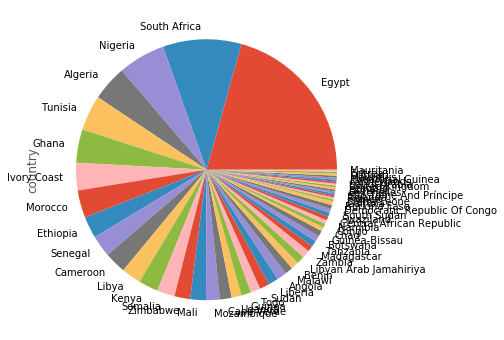

In [0]:
african_countries = sub_prod_africa.sort_values(by='country', ascending=True)
african_countries['country'].value_counts().plot(kind='pie')

In [0]:
sub_prod_africa.sort_values('historical_popularity_index', ascending=False).head(5)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
11,Moses,Male,-1391.0,Wadi Tumilat,Egypt,Africa,Religious Figure,Religion,Institutions,115,30.8632
28,Cleopatra VII of Egypt,Female,-69.0,Alexandria,Egypt,Africa,Politician,Government,Institutions,100,30.0367
33,Augustine of Hippo,Male,354.0,Souk Ahras,Algeria,Africa,Philosopher,Philosophy,Humanities,105,29.8872
45,Hannibal Barca,Male,-248.0,Carthage,Tunisia,Africa,Politician,Government,Institutions,86,29.6911
50,Nefertiti,Female,-1370.0,Thebes,Egypt,Africa,Companion,Companions,Public Figure,74,29.5711


In [0]:
sub_prod_africa['country'].unique(), sub_prod_africa['country'].nunique()

(array(['Egypt', 'Algeria', 'Tunisia', 'Libya', 'South Africa', 'Tanzania',
        'Morocco', 'Ghana', 'Uganda', 'Kenya', 'Ethiopia', 'Benin',
        'Madagascar', nan, 'Zimbabwe', 'Mozambique',
        'Democratic Republic Of Congo', 'Central African Republic',
        'Senegal', 'Saudi Arabia', 'Angola', 'Nigeria', 'Sudan',
        'Cape Verde', 'Congo', 'Somalia', 'Equatorial Guinea', 'Liberia',
        'Cameroon', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Mali',
        'Malawi', 'Rwanda', 'Burkina Faso', 'Togo', 'Namibia', 'Zambia',
        'Libyan Arab Jamahiriya', 'Botswana', 'Chad', 'Eritrea',
        'Seychelles', 'Mauritius', 'Netherlands', 'South Sudan',
        'São Tomé And Príncipe', 'Lesotho', 'Mauritania', 'United Kingdom',
        'Burundi', 'Djibouti', 'Sierra Leone', 'Swaziland', 'Gambia',
        'France'], dtype=object), 56)

### Looking at industry trends in countries in South America

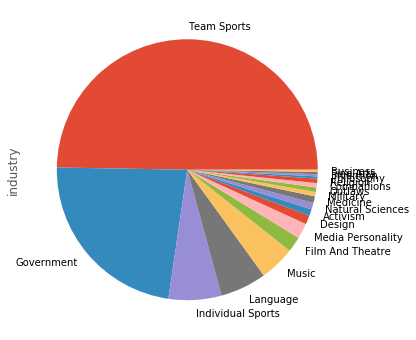

In [0]:
sub_prod_south_america = prod[prod['continent'] == 'South America']
sub_prod_south_america['industry'].value_counts().plot(kind='pie')

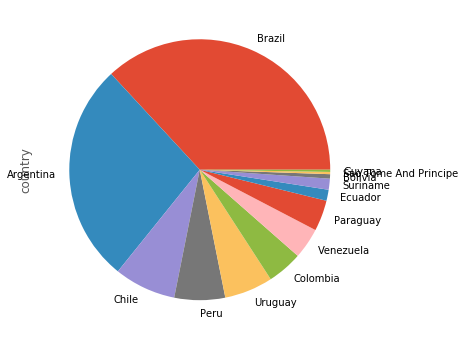

In [0]:
south_american_countries = sub_prod_south_america.sort_values(by='country', ascending=True)
south_american_countries['country'].value_counts().plot(kind='pie')

In [0]:
sub_prod_south_america.sort_values('historical_popularity_index', ascending=False).head(5)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
71,Che Guevara,Male,1928.0,Rosario,Argentina,South America,Social Activist,Activism,Public Figure,129,29.1644
307,Gabriel García Márquez,Male,1927.0,Aracataca,Colombia,South America,Writer,Language,Humanities,103,27.4937
322,Pelé,Male,1940.0,Três Corações,Brazil,South America,Soccer Player,Team Sports,Sports,88,27.4466
395,Pablo Neruda,Male,1904.0,Parral,Chile,South America,Writer,Language,Humanities,95,27.2282
432,Simón Bolívar,Male,1783.0,Caracas,Venezuela,South America,Politician,Government,Institutions,112,27.1433


In [0]:
sub_prod_south_america['country'].unique(), sub_prod_south_america['country'].nunique()

(array(['Argentina', 'Colombia', 'Brazil', 'Chile', 'Venezuela', 'Ecuador',
        'Peru', 'Paraguay', 'Uruguay', 'Bolivia', 'Suriname',
        'Sao Tome And Principe', 'Guyana'], dtype=object), 13)

### Looking at industry trends in countries in North America

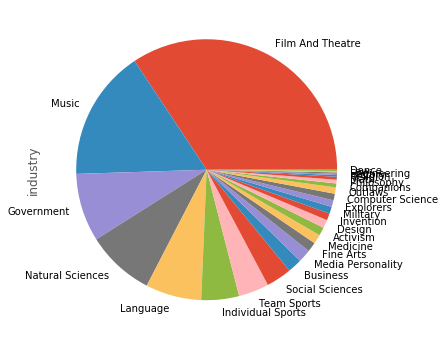

In [0]:
sub_prod_north_america = prod[prod['continent'] == 'North America']
sub_prod_north_america['industry'].value_counts().plot(kind='pie')

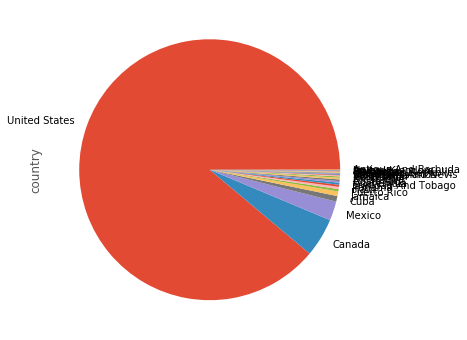

In [0]:
north_american_countries = sub_prod_north_america.sort_values(by='country', ascending=True)
north_american_countries['country'].value_counts().plot(kind='pie')

In [0]:
sub_prod_north_america.sort_values('historical_popularity_index', ascending=False).head(5)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
111,"Martin Luther King, Jr.",Male,1929.0,Atlanta,United States,North America,Social Activist,Activism,Public Figure,116,28.6877
116,Elvis Presley,Male,1935.0,Tupelo,United States,North America,Singer,Music,Arts,118,28.6172
142,Marilyn Monroe,Female,1926.0,Los Angeles,United States,North America,Actor,Film And Theatre,Arts,143,28.3466
170,Walt Disney,Male,1901.0,Chicago,United States,North America,Producer,Business,Business & Law,113,28.1723
186,Benjamin Franklin,Male,1706.0,Boston,United States,North America,Politician,Government,Institutions,88,28.0867


In [0]:
sub_prod_north_america['country'].unique(), sub_prod_north_america['country'].nunique()

(array(['United States', 'Jamaica', 'Cuba', 'Mexico', 'Us Virgin Islands',
        'Canada', 'Guatemala', 'Nicaragua', 'United Kingdom',
        'Dominican Republic', 'Saint Kitts And Nevis', 'Costa Rica',
        'Saint Lucia', 'Panama', 'Trinidad And Tobago', 'El Salvador',
        'Malaysia', 'Haiti', 'Antigua And Barbuda', 'Aruba', 'Puerto Rico',
        'Barbados', 'Honduras', 'Sri Lanka', 'Bermuda', 'Greenland'],
       dtype=object), 26)

### Looking at industry trends in countries in Oceania

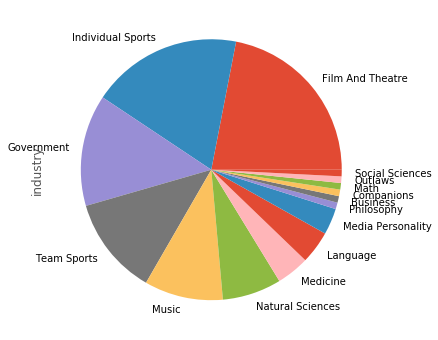

In [0]:
sub_prod_oceania = prod[prod['continent'] == 'Oceania']
sub_prod_oceania['industry'].value_counts().plot(kind='pie')

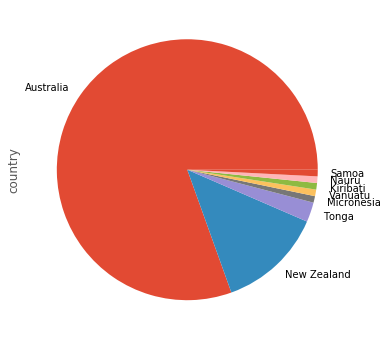

In [0]:
oceania_countries = sub_prod_oceania.sort_values(by='country', ascending=True)
oceania_countries['country'].value_counts().plot(kind='pie')

In [0]:
sub_prod_oceania.sort_values('historical_popularity_index', ascending=False).head(5)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
508,Ernest Rutherford,Male,1871.0,Brightwater,New Zealand,Oceania,Chemist,Natural Sciences,Science & Technology,97,26.9284
2794,Edmund Hillary,Male,1919.0,Auckland,New Zealand,Oceania,Mountaineer,Individual Sports,Sports,96,24.6151
2838,Errol Flynn,Male,1909.0,Hobart,Australia,Oceania,Actor,Film And Theatre,Arts,59,24.5884
3329,William Lawrence Bragg,Male,1890.0,Adelaide,Australia,Oceania,Physicist,Natural Sciences,Science & Technology,55,24.3210
4014,Elton Mayo,Male,1880.0,Adelaide,Australia,Oceania,Psychologist,Social Sciences,Science & Technology,26,23.9398


In [0]:
sub_prod_oceania['country'].unique(), sub_prod_oceania['country'].nunique()

(array(['New Zealand', 'Australia', 'Tonga', 'Micronesia', 'Samoa',
        'Kiribati', 'Vanuatu', 'Nauru'], dtype=object), 8)

## Finding the golden opportunity in industries

In [0]:
prod['industry'].value_counts()

Government           2705
Film And Theatre     1374
Team Sports          1230
Music                1054
Language              999
Natural Sciences      736
Individual Sports     526
Religion              518
Fine Arts             299
Philosophy            281
Military              233
Social Sciences       187
Math                  161
Medicine              142
Design                127
Activism              114
Explorers             102
Companions            101
Business               91
Media Personality      87
Invention              67
Outlaws                56
History                49
Engineering            40
Computer Science       33
Law                    17
Dance                  12
Name: industry, dtype: int64

### Looking at Government

*   There are 2705 figures
*   Occupation types are Politician, Nobleman, Diplomat, Public Worker and Judge

In [0]:
industry_government = prod[prod['industry'] == 'Government']
industry_government.sort_values(by='historical_popularity_index', ascending=False).head(1)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
7,Julius Caesar,Male,-100.0,Rome,Italy,Europe,Politician,Government,Institutions,128,31.1161


In [0]:
industry_government['occupation'].value_counts()

Politician       2530
Nobleman          116
Diplomat           36
Public Worker      14
Judge               9
Name: occupation, dtype: int64

In [0]:
industry_government['sex'].value_counts()

Male      2527
Female     178
Name: sex, dtype: int64

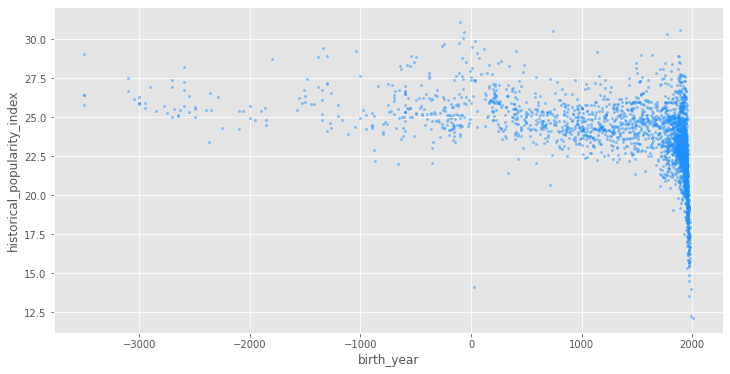

In [0]:
industry_government.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(12,6), s=5, alpha=0.5)

Unknown           321
United Kingdom    178
France            169
United States     150
Germany           148
                 ... 
Hong Kong           1
Sierra Leone        1
Qatar               1
Eritrea             1
Samoa               1
Name: country, Length: 183, dtype: int64

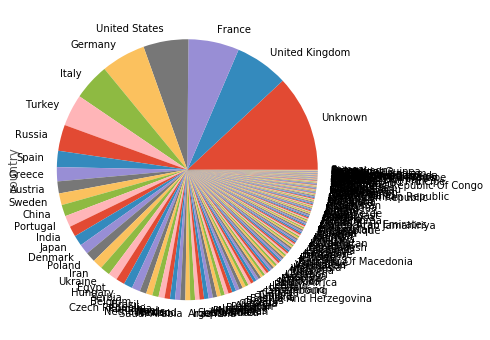

In [0]:
industry_government['country'].value_counts().plot(kind='pie')
industry_government['country'].value_counts()

### Looking at Language

*   There are 999 figures
*   Occupation types are Writer, Linguist, Journalist, Critic
*   Of the 999 figures, 732 figures are born between 1800 and 2000
*   Of the 732 figures, 375 figures are specifically born between 1870 and 1930
*   Of the 732 figures, 694 figures are writers
*   Of the 375 figures, 76 figures are born in United States






In [0]:
industry_language = prod[prod['industry'] == 'Language']
industry_language.sort_values(by='historical_popularity_index', ascending=False).head(1)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index,birth_year_numeric
8,Homer,Male,-800.0,Smyrna,Turkey,Europe,Writer,Language,Humanities,141,31.1087,-800.0


In [0]:
industry_language['occupation'].value_counts()

Writer        954
Linguist       21
Journalist     19
Critic          5
Name: occupation, dtype: int64

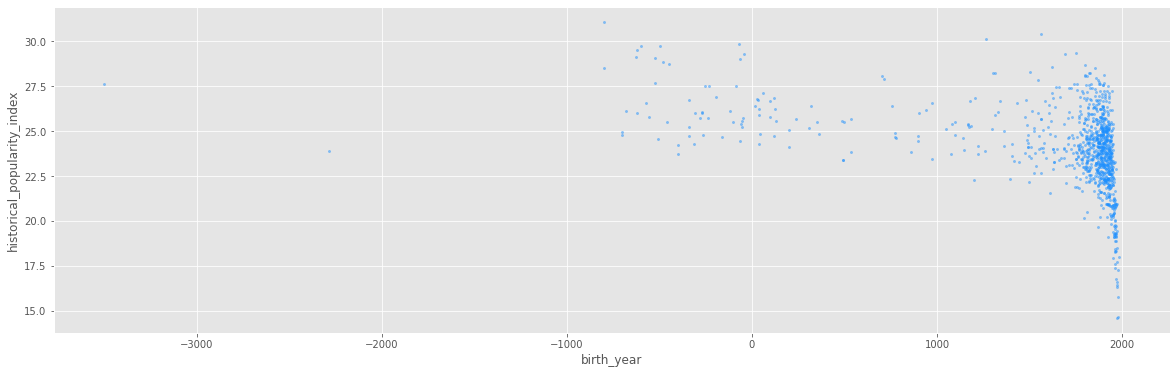

In [0]:
industry_language.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(20,6), s=5, alpha=0.5)

732

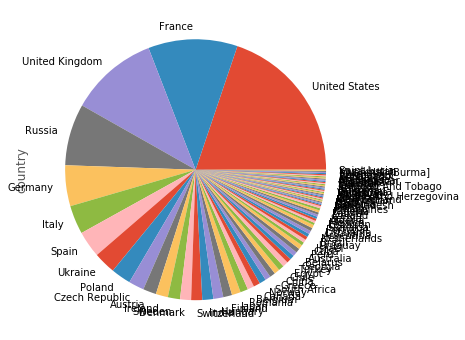

In [0]:
language_year_18_20 = industry_language[(industry_language['birth_year'] >= 1800) & (industry_language['birth_year'] <= 2000)]

language_year_18_20['country'].value_counts().plot(kind='pie')
language_year_18_20['continent'].value_counts().sum()

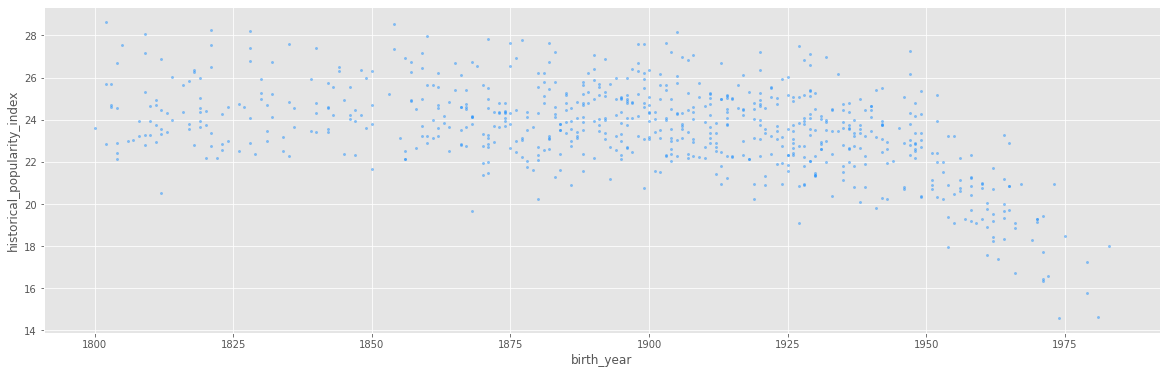

In [0]:
language_year_18_20.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(20,6), s=5, alpha=0.5)

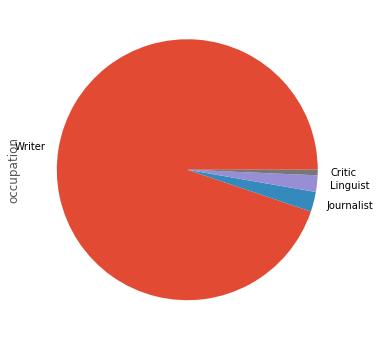

In [0]:
language_year_18_20['occupation'].value_counts().plot(kind='pie')

In [0]:
language_year_18_20['occupation'].value_counts().sort_index()

Critic          5
Journalist     18
Linguist       15
Writer        694
Name: occupation, dtype: int64

In [0]:
occupation_writer['birth_year'].value_counts().head(10)

1914.0    10
1871.0    10
1929.0    10
1888.0    10
1928.0     9
1926.0     9
1911.0     9
1904.0     9
1920.0     9
1935.0     8
Name: birth_year, dtype: int64

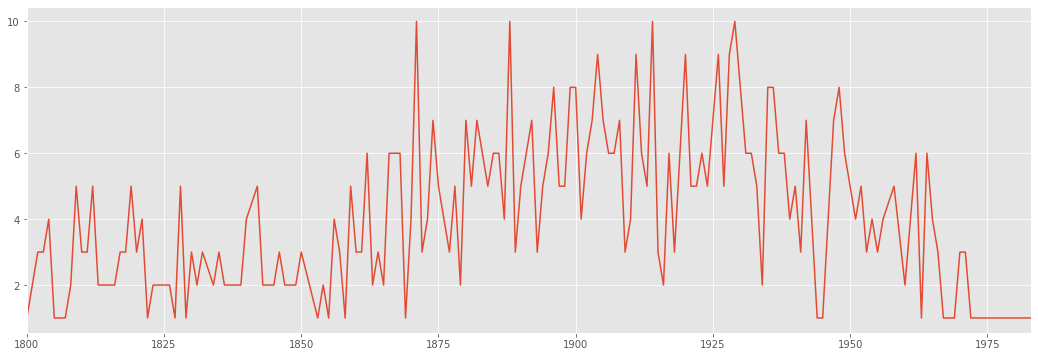

In [0]:
occupation_writer = language_year_18_20[language_year_18_20['occupation'] == 'Writer']

occupation_writer['birth_year'].value_counts().sort_index().plot()

United States      76
France             41
United Kingdom     33
Russia             32
Germany            21
                   ..
Azerbaijan          1
Brazil              1
Bulgaria            1
Iran                1
Myanmar [Burma]     1
Name: country, Length: 64, dtype: int64

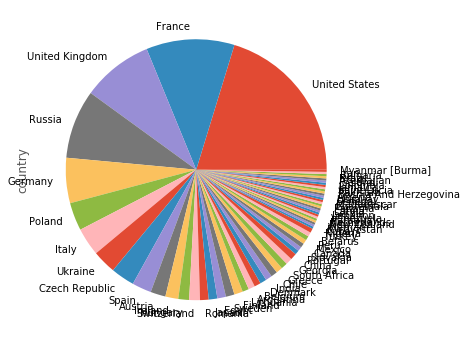

In [0]:
language_year_1870_1930 = industry_language[(industry_language['birth_year'] >= 1870) & (industry_language['birth_year'] <= 1930)]

language_year_1870_1930['country'].value_counts().plot(kind='pie')
language_year_1870_1930['country'].value_counts()


Writer        72
Linguist       3
Journalist     1
Name: occupation, dtype: int64

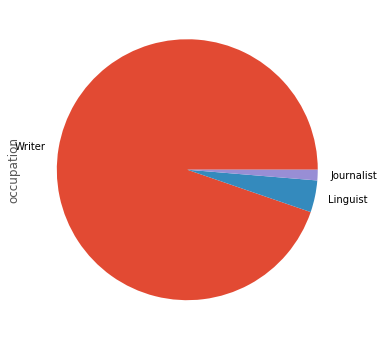

In [0]:
united_states_design = language_year_1870_1930[language_year_1870_1930['country'] == 'United States'].sort_values(by='city', ascending=False)

united_states_design['occupation'].value_counts().plot(kind='pie')
united_states_design['occupation'].value_counts()

### Looking at Natural Sciences

*   There are 736 figures
*   Occupation types are Physicist, Chemist, Biologist, Astronomer, Archaeologist, Geologist
*   Of the 736 figures, 633 figures are born between 1800 and 2000
*   Of the 633 figures, 241 are physicists, 206 are chemists and 120 are biologists
*   Of the 736 figures, only 22 are women
*   Of the 22 figures, 21 women are born between 1860s to 1960s

In [258]:
industry_natural_sciences = prod[prod['industry'] == 'Natural Sciences']
industry_natural_sciences.sort_values(by='historical_popularity_index', ascending=False).head(1)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
21,Isaac Newton,Male,1642.0,Woolsthorpe-by-Colsterworth,United Kingdom,Europe,Physicist,Natural Sciences,Science & Technology,191,30.2889


In [259]:
industry_natural_sciences['occupation'].value_counts()

Physicist        268
Chemist          220
Biologist        141
Astronomer        84
Archaeologist     13
Geologist         10
Name: occupation, dtype: int64

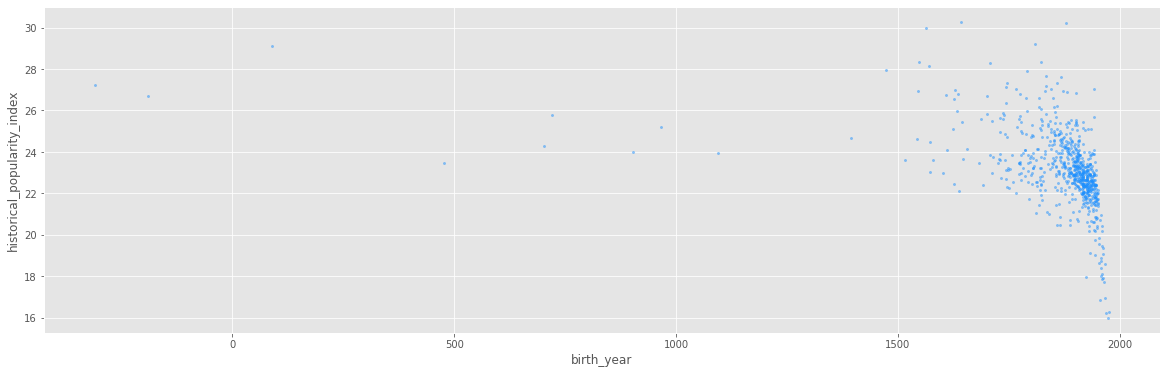

In [260]:
industry_natural_sciences.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(20,6), s=5, alpha=0.5)

633

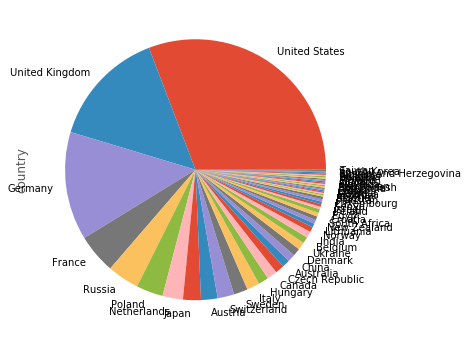

In [265]:
natural_sciences_18_20 = industry_natural_sciences[(industry_natural_sciences['birth_year'] >= 1800) & (industry_natural_sciences['birth_year'] <= 2000)]

natural_sciences_18_20['country'].value_counts().plot(kind='pie')
natural_sciences_18_20['continent'].value_counts().sum()

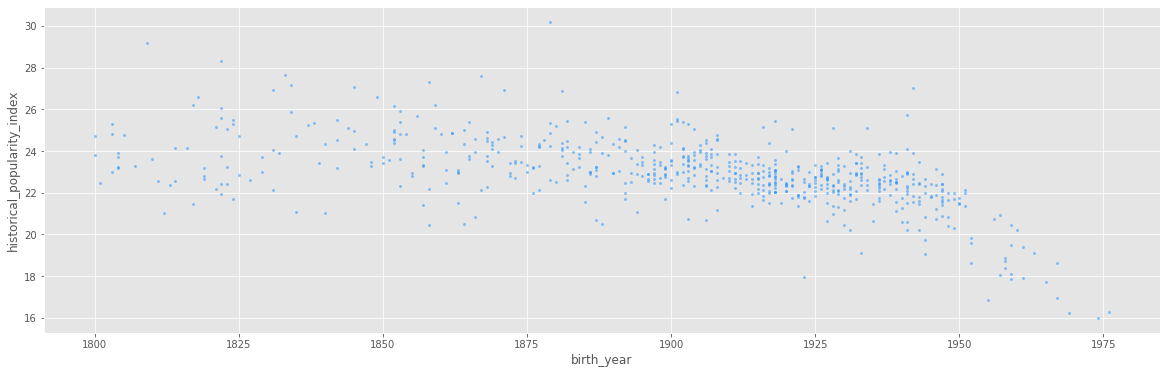

In [266]:
natural_sciences_18_20.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(20,6), s=5, alpha=0.5)

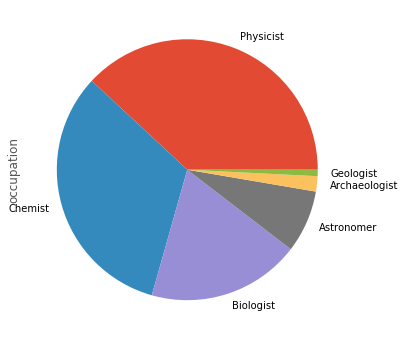

In [267]:
natural_sciences_18_20['occupation'].value_counts().plot(kind='pie')

In [268]:
natural_sciences_18_20['occupation'].value_counts().sort_index()

Archaeologist     12
Astronomer        49
Biologist        120
Chemist          206
Geologist          5
Physicist        241
Name: occupation, dtype: int64

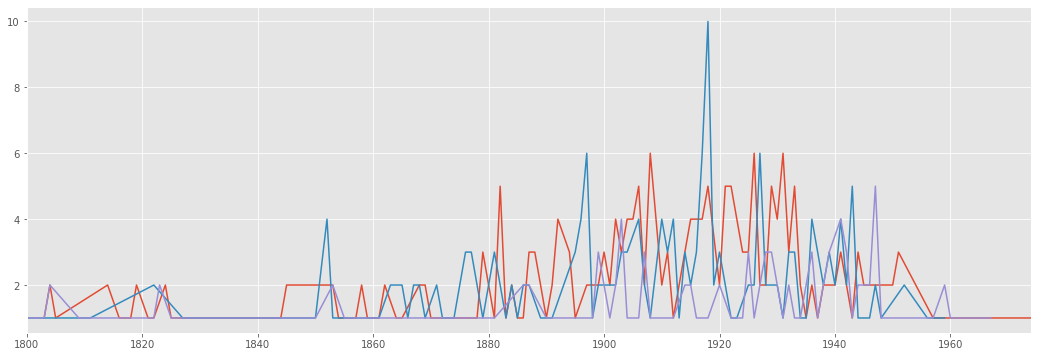

In [279]:
#red
occupation_physicist = natural_sciences_18_20[(natural_sciences_18_20['occupation'] == 'Physicist')]
occupation_physicist['birth_year'].value_counts().sort_index().plot()

#blue
occupation_chemist = natural_sciences_18_20[(natural_sciences_18_20['occupation'] == 'Chemist')]
occupation_chemist['birth_year'].value_counts().sort_index().plot()

#purple
occupation_biologist = natural_sciences_18_20[(natural_sciences_18_20['occupation'] == 'Biologist')]
occupation_biologist['birth_year'].value_counts().sort_index().plot()

In [0]:
natural_sciences_female = industry_natural_sciences[industry_natural_sciences['sex'] == 'Female']

In [286]:
natural_sciences_female['birth_year'].value_counts().sort_index()

1750.0    1
1863.0    1
1867.0    1
1868.0    1
1878.0    1
1896.0    1
1897.0    1
1902.0    1
1906.0    1
1907.0    1
1910.0    1
1918.0    1
1920.0    1
1921.0    2
1932.0    1
1938.0    1
1942.0    1
1947.0    2
1948.0    1
1961.0    1
Name: birth_year, dtype: int64

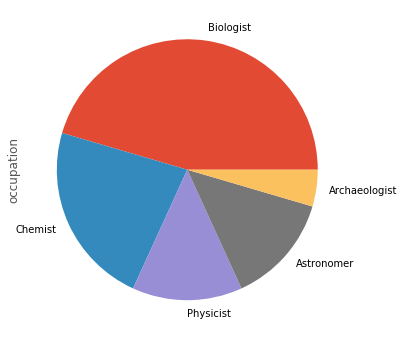

In [287]:
natural_sciences_female['occupation'].value_counts().plot(kind='pie')

### Looking at Religion

*   There are 518 figures
*   Occupation is limited to Religious Figure
*   When applying bar plot to the birth years, two clusters can be found: around -3500 and 0-500
*   Figures in both -3500 and 0-500 are mostly from Europe and Asia

In [0]:
industry_religion = prod[prod['industry'] == 'Religion']
industry_religion.sort_values(by='historical_popularity_index', ascending=False).head(1)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
2,Jesus Christ,Male,-4.0,Judea,Israel,Asia,Religious Figure,Religion,Institutions,214,31.8981


In [0]:
industry_religion['occupation'].value_counts()

Religious Figure    518
Name: occupation, dtype: int64

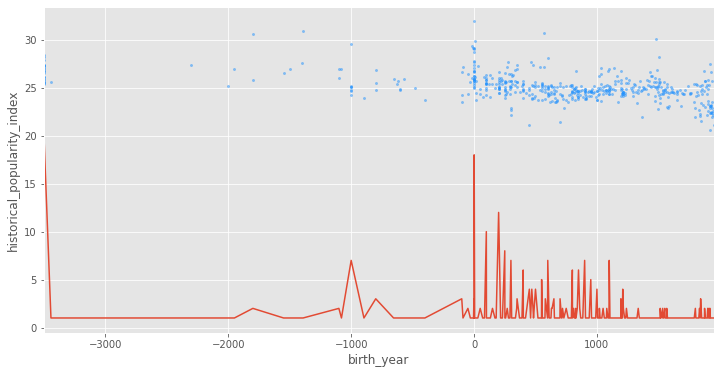

In [0]:
industry_religion.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(12,6), s=5, alpha=0.5)

industry_religion['birth_year'].value_counts().sort_index().plot()

Europe           331
Asia             103
Unknown           24
Africa            17
North America      5
South America      2
Name: continent, dtype: int64

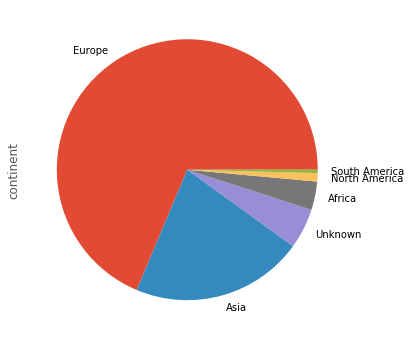

In [0]:
religion_year_n3 = industry_religion[(industry_religion['birth_year'] >= -3000)]

religion_year_n3['continent'].value_counts().plot(kind='pie')
religion_year_n3['continent'].value_counts()

Europe     67
Asia       44
Unknown    12
Africa      8
Name: continent, dtype: int64

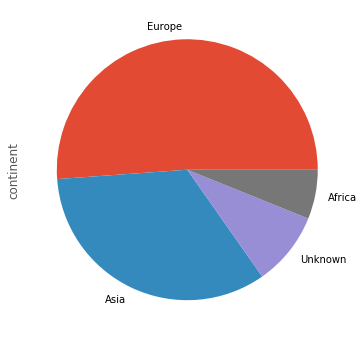

In [0]:
religion_year_0_5 = industry_religion[(industry_religion['birth_year'] >= -100) & (industry_religion['birth_year'] <= 500)]

religion_year_0_5['continent'].value_counts().plot(kind='pie')
religion_year_0_5['continent'].value_counts()

In [0]:
industry_religion['sex'].value_counts()

Male      486
Female     32
Name: sex, dtype: int64

In [0]:
industry_religion_female = industry_religion[industry_religion['sex'] == 'Female']
industry_religion_female['country'].value_counts()

Italy        6
France       3
Israel       3
Egypt        3
Unknown      3
Turkey       2
Palestine    2
Germany      1
Sweden       1
Algeria      1
Yemen        1
Peru         1
Slovakia     1
Iran         1
Iraq         1
Poland       1
Spain        1
Name: country, dtype: int64

### Looking at Philosophy

*   There are 281 figures
*   Occupation type is limited to Philosopher
*   Of the 281 figures, 190 are born in Europe making up near 68%
*   Of the 10 figures in highest historical popularity index, 5 are philosophers
*   These 5 figures are born between -570 to -384
*   Of the 281 figures, only 6 are women
*   The 6 figures are born between 1890s to 1969
*   Of the 6 figures, 4 figures are born in Europe


In [0]:
industry_philosophy = prod[prod['industry'] == 'Philosophy']
industry_philosophy.sort_values(by='historical_popularity_index', ascending=False).head(10)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
0,Aristotle,Male,-384,Stageira,Greece,Europe,Philosopher,Philosophy,Humanities,152,31.9938
1,Plato,Male,-427,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,142,31.9888
3,Socrates,Male,-469,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,137,31.6521
6,Confucius,Male,-551,Qufu,China,Asia,Philosopher,Philosophy,Humanities,192,31.3705
9,Pythagoras,Male,-570,Samos Island,Greece,Europe,Philosopher,Philosophy,Humanities,114,31.0691
27,Gautama Buddha,Male,-563,Lumbini,Nepal,Asia,Philosopher,Philosophy,Humanities,124,30.0418
33,Augustine of Hippo,Male,354,Souk Ahras,Algeria,Africa,Philosopher,Philosophy,Humanities,105,29.8872
37,Thales,Male,-635,Miletus,Turkey,Asia,Philosopher,Philosophy,Humanities,84,29.8485
46,Immanuel Kant,Male,1724,Kaliningrad,Russia,Europe,Philosopher,Philosophy,Humanities,125,29.6882
55,Epicurus,Male,-341,Samos Island,Greece,Europe,Philosopher,Philosophy,Humanities,68,29.4762


In [0]:
industry_philosophy['occupation'].value_counts()

Philosopher    281
Name: occupation, dtype: int64

In [0]:
industry_philosophy['birth_year'].value_counts().head(10)

-500.0     4
 1929.0    3
 1863.0    3
 1911.0    3
-490.0     3
 1931.0    3
 1874.0    3
 1895.0    3
 1908.0    3
 1891.0    3
Name: birth_year, dtype: int64

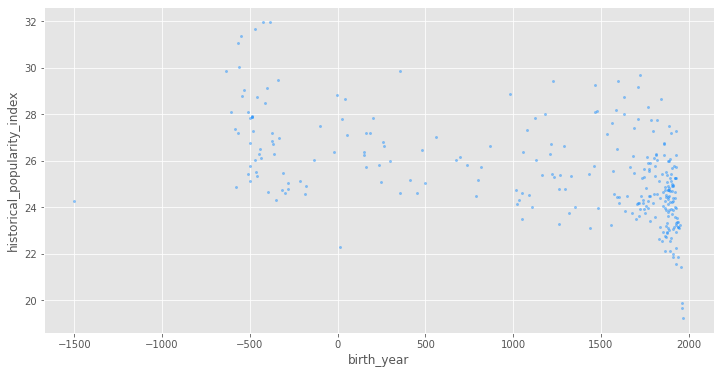

In [0]:
industry_philosophy.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(12,6), s=5, alpha=0.5)

In [0]:
industry_philosophy['sex'].value_counts()

Male      275
Female      6
Name: sex, dtype: int64

In [0]:
philosophy_female = industry_philosophy[industry_philosophy['sex'] == 'Female']
philosophy_female

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
1333,Hannah Arendt,Female,1906,Hanover,Germany,Europe,Philosopher,Philosophy,Humanities,50,25.6875
2423,Edith Stein,Female,1891,Wrocław,Poland,Europe,Philosopher,Philosophy,Humanities,39,24.8288
3185,Simone Weil,Female,1909,Paris,France,Europe,Philosopher,Philosophy,Humanities,37,24.4011
5094,Julia Kristeva,Female,1941,Sliven,Bulgaria,Europe,Philosopher,Philosophy,Humanities,31,23.3533
7795,Judith Butler,Female,1956,Cleveland,United States,North America,Philosopher,Philosophy,Humanities,34,21.4471
9177,Ayaan Hirsi Ali,Female,1969,Mogadishu,Somalia,Africa,Philosopher,Philosophy,Humanities,36,19.2462


In [0]:
industry_philosophy['continent'].value_counts()

Europe           190
Asia              55
Africa            13
North America     11
Unknown            9
South America      1
Oceania            1
Name: continent, dtype: int64

### Looking at Design

*   There are 127 figures
*   Occupation is limited to Architect, Comic Artist, Designer, Fashion Designer, Game Designer
*   Majority of the figures were born after 1900
*   There are 23 figures from United States, which makes it the highest number of designers
*   Of the 23 figures, 14 figures are from the Northeast region





In [0]:
industry_design = prod[prod['industry'] == 'Design']
industry_design.sort_values(by='historical_popularity_index', ascending=False).head(1)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index,birth_year_numeric
115,Imhotep,Male,-2650.0,Memphis,Egypt,Africa,Architect,Design,Arts,56,28.6228,-2650.0


In [0]:
industry_design['occupation'].value_counts()

Architect           73
Comic Artist        24
Designer            16
Fashion Designer    10
Game Designer        4
Name: occupation, dtype: int64

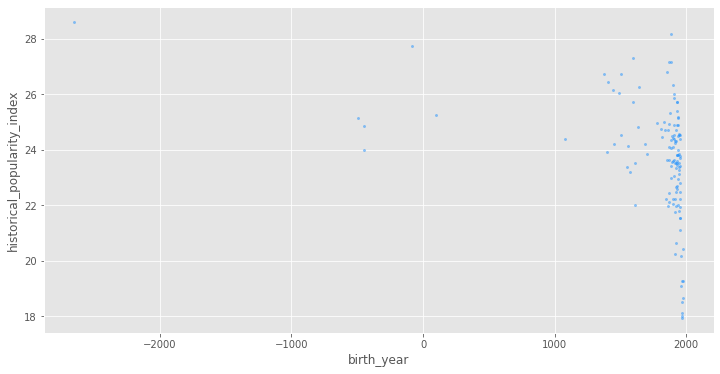

In [0]:
industry_design.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(12,6), s=5, alpha=0.5)

United States     23
Italy             16
France            14
United Kingdom    12
Japan             10
Germany            6
Switzerland        5
Belgium            4
Spain              3
Unknown            3
Name: country, dtype: int64

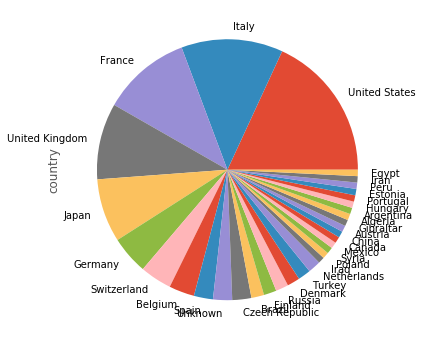

In [0]:
industry_design['country'].value_counts().plot(kind='pie')
industry_design['country'].value_counts().head(10)

In [0]:
united_states_design = industry_design[industry_design['country'] == 'United States'].sort_values(by='city', ascending=False)
united_states_design['city'].value_counts()

New York                  7
Boston                    2
Spring Lake               1
Atlanta                   1
San Francisco-Bay Area    1
Olney                     1
Minneapolis               1
Richland Center           1
Detroit                   1
Waterbury                 1
Louisville                1
Philadelphia              1
Portland                  1
Newark                    1
Merrill                   1
Cleveland                 1
Name: city, dtype: int64

Comic Artist        10
Architect            7
Designer             2
Fashion Designer     2
Game Designer        2
Name: occupation, dtype: int64

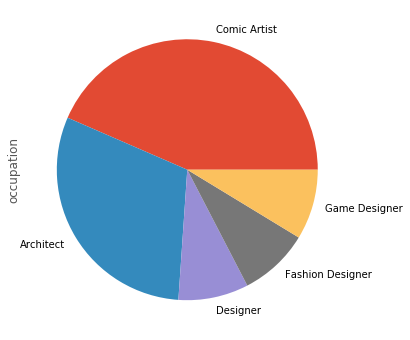

In [0]:
united_states_design['occupation'].value_counts().plot(kind='pie')
united_states_design['occupation'].value_counts().head(10)

In [0]:
france_design = industry_design[industry_design['country'] == 'France'].sort_values(by='city', ascending=False)
france_design['city'].value_counts()

Paris               5
France              2
Toulon              1
Fumel               1
Granville           1
Fismes              1
Saumur              1
Nogent-sur-Marne    1
Arcueil             1
Name: city, dtype: int64

Architect           8
Comic Artist        3
Fashion Designer    3
Name: occupation, dtype: int64

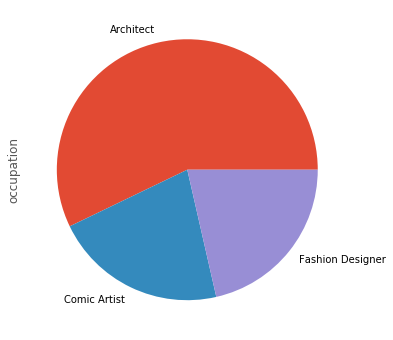

In [0]:
france_design['occupation'].value_counts().plot(kind='pie')
france_design['occupation'].value_counts().head(10)

In [0]:
united_kingdom_design = industry_design[industry_design['country'] == 'United Kingdom'].sort_values(by='city', ascending=False)
united_kingdom_design['city'].value_counts()

Glasgow           2
Wheathampstead    1
London            1
Walthamstow       1
Northampton       1
Tintwistle        1
East Knoyle       1
Reddish           1
Lewisham          1
Chingford         1
Comber            1
Name: city, dtype: int64

Designer            5
Architect           5
Fashion Designer    1
Comic Artist        1
Name: occupation, dtype: int64

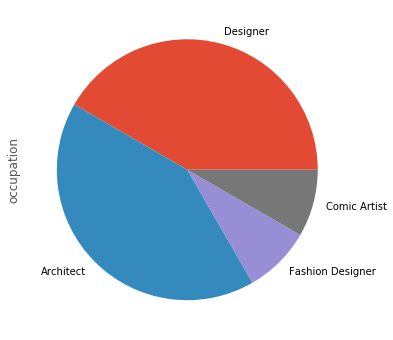

In [0]:
united_kingdom_design['occupation'].value_counts().plot(kind='pie')
united_kingdom_design['occupation'].value_counts().head(10)

In [0]:
japan_design = industry_design[industry_design['country'] == 'Japan'].sort_values(by='city', ascending=False)
japan_design['city'].value_counts()

Osaka       2
Toyonaka    1
Niigata     1
Nagi        1
Fuchu       1
Setagaya    1
Nagoya      1
Kumamoto    1
Sonobe      1
Name: city, dtype: int64

Comic Artist     6
Game Designer    2
Architect        2
Name: occupation, dtype: int64

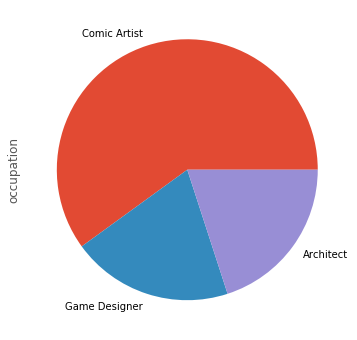

In [0]:
japan_design['occupation'].value_counts().plot(kind='pie')
japan_design['occupation'].value_counts().head(10)

In [0]:
# architect = united_states_design[united_states_design['occupation'] == 'Comic Artist']

In [0]:
# united_states_design['birth_year'].value_counts().sort_index()

### Looking at Explorers

*   There are 102 figures
*   Occupation types are Explorer, Astronaut
*   When applying scatter plot to the birth years, two clusters can be found: around 1400-1600s and 1900s
*   Of the 34 figures in the 1900s, 32 are Astronauts
*   While the figures in 1400-1600s are limited to European countries, 1900s show a variety of figures from Europe, North America and Asia






In [0]:
industry_explorers = prod[prod['industry'] == 'Explorers']
industry_explorers.sort_values(by='historical_popularity_index', ascending=False).head(1)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
23,Christopher Columbus,Male,1451.0,Genoa,Italy,Europe,Explorer,Explorers,Exploration,153,30.1753


In [0]:
industry_explorers['occupation'].value_counts()

Explorer     70
Astronaut    32
Name: occupation, dtype: int64

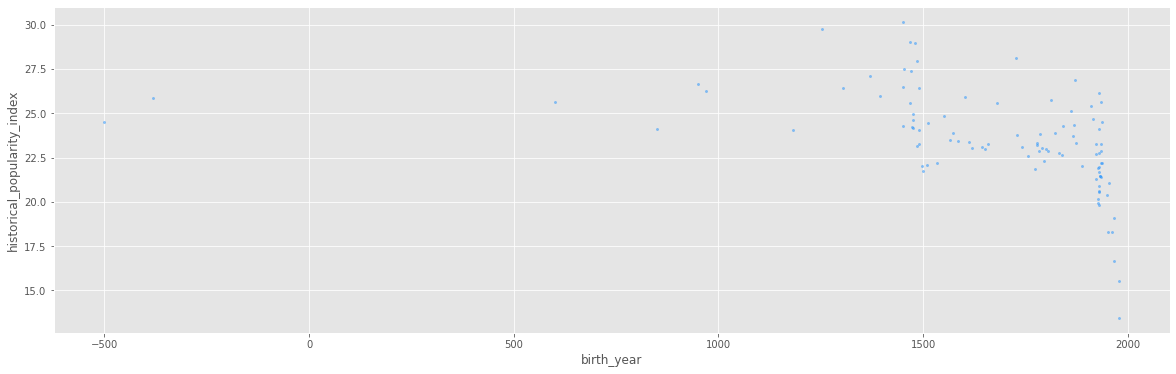

In [0]:
industry_explorers.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(20,6), s=5, alpha=0.5)

Europe    26
Name: continent, dtype: int64

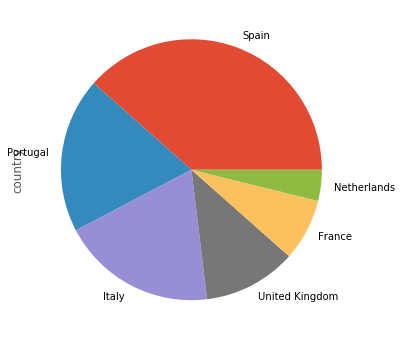

In [0]:
explorers_year_14_16 = industry_explorers[(industry_explorers['birth_year'] >= 1400) & (industry_explorers['birth_year'] <= 1600)]

explorers_year_14_16['country'].value_counts().plot(kind='pie')
explorers_year_14_16['continent'].value_counts()

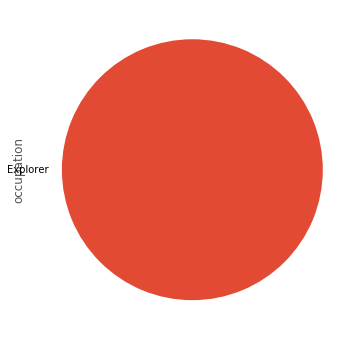

In [0]:
explorers_year_14_16['occupation'].value_counts().plot(kind='pie')

North America    18
Europe           10
Asia              6
Name: continent, dtype: int64

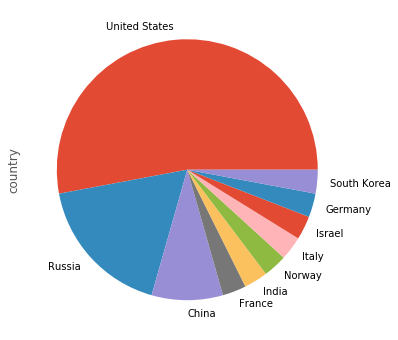

In [0]:
explorers_year_19_20 = industry_explorers[(industry_explorers['birth_year'] >= 1900) & (industry_explorers['birth_year'] <= 2000)]

explorers_year_19_20['country'].value_counts().plot(kind='pie')
explorers_year_19_20['continent'].value_counts()

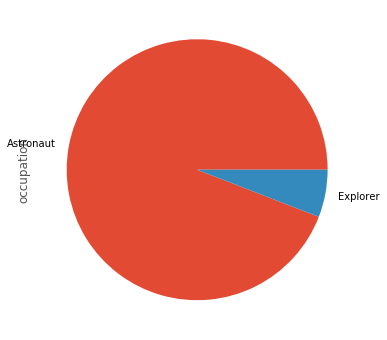

In [0]:
explorers_year_19_20['occupation'].value_counts().plot(kind='pie')

### Looking at Business

*   There are 91 figures
*   Occupation types are Business Person, Producer
*   Of the 91 figures, 69 figures are born in the 20th century
*   Of the 69 figures, 36 figures are born in United States
*   Of the 91 figures, only 4 are women
*   Of the 4 women figures, 2 are from United States


In [0]:
industry_business = prod[prod['industry'] == 'Business']
industry_business.sort_values(by='historical_popularity_index', ascending=False).head(1)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
170,Walt Disney,Male,1901.0,Chicago,United States,North America,Producer,Business,Business & Law,113,28.1723


In [0]:
industry_business['occupation'].value_counts()

Businessperson    79
Producer          12
Name: occupation, dtype: int64

In [0]:
industry_business['sex'].value_counts()

Male      87
Female     4
Name: sex, dtype: int64

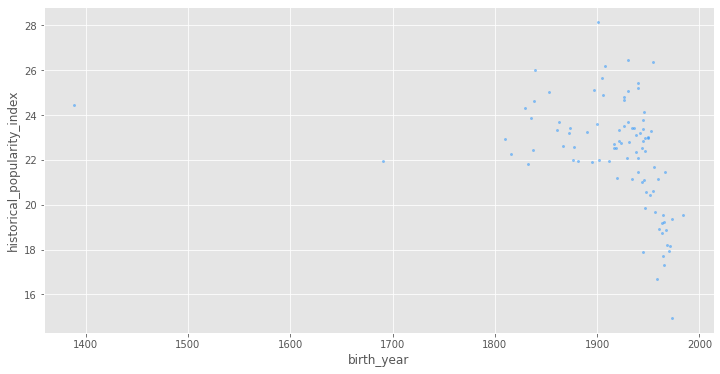

In [0]:
industry_business.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(12,6), s=5, alpha=0.5)

United States     36
Russia             4
United Kingdom     4
Germany            2
India              2
France             2
Italy              2
Hungary            2
Taiwan             1
Switzerland        1
Thailand           1
Mexico             1
South Africa       1
Yemen              1
Spain              1
Japan              1
Turkey             1
Bangladesh         1
Czech Republic     1
Sweden             1
Brazil             1
Australia          1
China              1
Name: country, dtype: int64

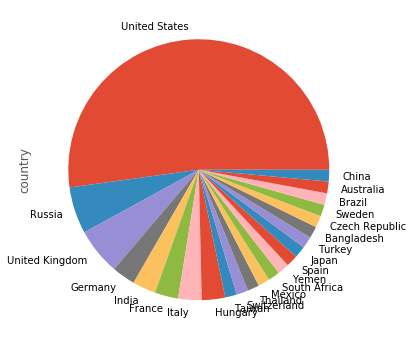

In [0]:
business_year_19 = industry_business[(industry_business['birth_year'] >= 1900) & (industry_business['birth_year'] <= 2000)]

business_year_19['country'].value_counts().plot(kind='pie')
business_year_19['country'].value_counts()

In [0]:
business_year_19['birth_year'].value_counts().sum()

69

36

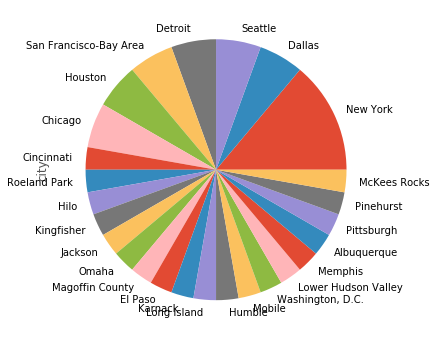

In [0]:
business_US = business_year_19[(business_year_19['country'] == 'United States')]

business_US['city'].value_counts().plot(kind='pie')
business_US['city'].value_counts().sum()

United States    2
China            1
Thailand         1
Name: country, dtype: int64

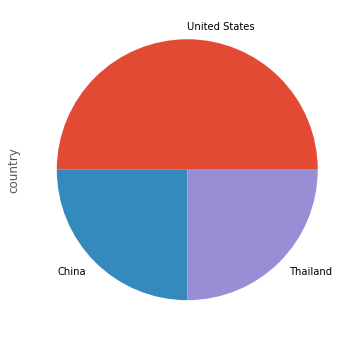

In [0]:
business_female = industry_business[(industry_business['sex'] == 'Female')]

business_female['country'].value_counts().plot(kind='pie')
business_female['country'].value_counts()

In [0]:
business_female

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
7353,Lady Bird Johnson,Female,1912.0,Karnack,United States,North America,Businessperson,Business,Business & Law,27,21.9303
8867,Rebiya Kadeer,Female,1947.0,Altay,China,Asia,Businessperson,Business,Business & Law,28,19.8335
9011,Melinda Gates,Female,1964.0,Dallas,United States,North America,Businessperson,Business,Business & Law,27,19.5365
9356,Yingluck Shinawatra,Female,1967.0,San Kamphaeng,Thailand,Asia,Businessperson,Business,Business & Law,42,18.8640


### Looking at Computer Science

*   There are 33 figures
*   Occupation is limited to Computer Scientist
*   All figures are born after 1900
*   The mode is found in 1940s and 1950s
*   Of 33, 18 figures are born in United States
*   Of these 18 figures, 11 are born in the Northeast, 4 in the East North Central(Midwest) regions
*   Of the 33 figures, only 1 is a woman: Grace Hopper. She is born in New York, United States

In [0]:
industry_cs = prod[prod['industry'] == 'Computer Science']
industry_cs.sort_values(by='historical_popularity_index', ascending=False).head(1)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index,birth_year_numeric
2196,Alan Turing,Male,1912.0,Maida Vale,United Kingdom,Europe,Computer Scientist,Computer Science,Science & Technology,108,24.9892,1912.0


In [0]:
industry_cs['occupation'].value_counts()

Computer Scientist    33
Name: occupation, dtype: int64

United States     18
United Kingdom     4
Russia             2
Netherlands        2
Greenland          1
Finland            1
India              1
Sri Lanka          1
Canada             1
Switzerland        1
Denmark            1
Name: country, dtype: int64

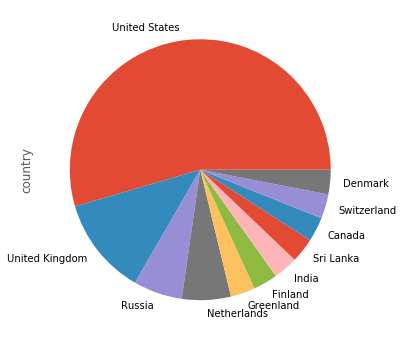

In [0]:
industry_cs['country'].value_counts().plot(kind='pie')
industry_cs['country'].value_counts()

In [0]:
united_states_cs = industry_cs[industry_cs['country'] == 'United States'].sort_values(by='city', ascending=False)
united_states_cs['city'].value_counts()

New York         6
Boston           2
Los Angeles      2
Milwaukee        1
Philadelphia     1
East Lansing     1
Michigan City    1
Baltimore        1
New Haven        1
New Orleans      1
Petoskey         1
Name: city, dtype: int64

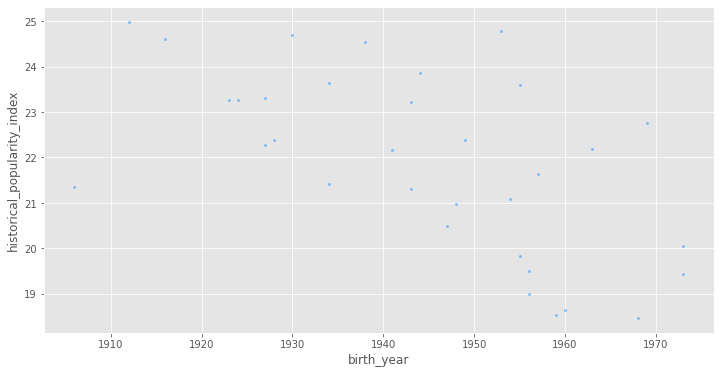

In [0]:
industry_cs.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(12,6), s=5, alpha=0.5)

In [0]:
cs_female = industry_cs[(industry_cs['sex'] == 'Female')]

cs_female

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
7867,Grace Hopper,Female,1906.0,New York,United States,North America,Computer Scientist,Computer Science,Science & Technology,33,21.3414


### Looking at Law

*   There are 17 figures
*   Occupation is limited to Lawyer
*   Of the 17 figures, 14 figures are born in 1840s to 1960s timeframe
*   Of the 17 figures, only 1 is a woman
*   Carla Del Ponte is born in 1947 in Switzerland

In [0]:
industry_law = prod[prod['industry'] == 'Law']
industry_law.sort_values(by='historical_popularity_index', ascending=False).head(1)

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
1096,Hugo Grotius,Male,1583,Delft,Netherlands,Europe,Lawyer,Law,Business & Law,49,25.931


In [0]:
industry_law['occupation'].value_counts()

Lawyer    17
Name: occupation, dtype: int64

In [0]:
industry_law['birth_year'].value_counts().sort_index()

1583    1
1746    1
1838    1
1843    2
1852    1
1854    1
1864    1
1887    1
1895    1
1900    1
1917    1
1921    1
1947    1
1950    1
1961    1
767     1
Name: birth_year, dtype: int64

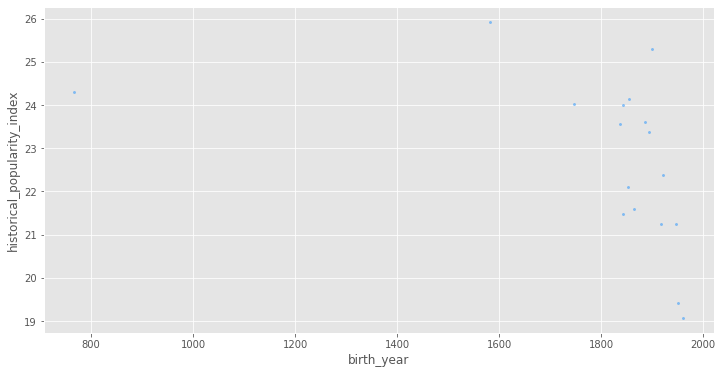

In [0]:
industry_law.plot(kind='scatter', x='birth_year', y='historical_popularity_index', \
        color='dodgerblue', figsize=(12,6), s=5, alpha=0.5)

In [0]:
industry_law['country'].value_counts().sort_index()

Belgium           1
France            3
Germany           1
Netherlands       2
Palestine         1
Romania           1
Switzerland       2
United Kingdom    2
United States     4
Name: country, dtype: int64

In [0]:
industry_law['sex'].value_counts().sort_index()

Female     1
Male      16
Name: sex, dtype: int64

In [0]:
law_female = industry_law[industry_law['sex'] == 'Female']
law_female

,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,historical_popularity_index
7942,Carla Del Ponte,Female,1947,Bignasco,Switzerland,Europe,Lawyer,Law,Business & Law,27,21.2439


## Others

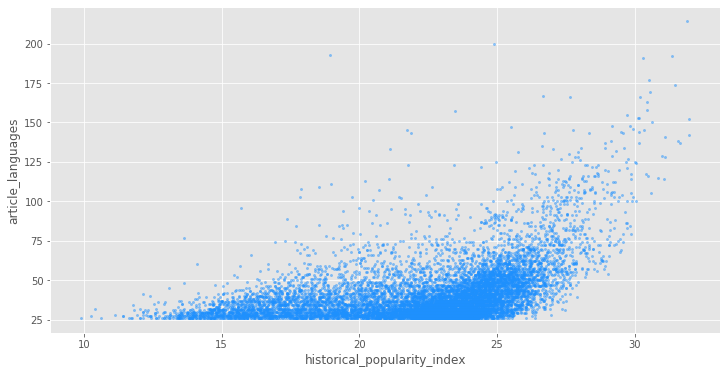

In [0]:
prod.plot(kind='scatter', x='historical_popularity_index', y='article_languages', \
        color='dodgerblue', figsize=(12,6), s=5, alpha=0.5)